## 資料預處理

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 超參數
num_epochs = 1
batch_size = 100
learning_rate = 0.001

# MNIST數據預處理
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


## 建立模型

In [4]:

# 定義簡單的ANN模型
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

## 設定優化器

In [5]:
# 優化器列表
optimizers = [
    torch.optim.SGD,
    torch.optim.SGD,
    torch.optim.SGD,
    torch.optim.Adagrad,
    torch.optim.Adadelta,
    torch.optim.RMSprop,
    torch.optim.Adam,
    torch.optim.SGD,  # 使用SGD兩次，一次帶動量，一次不帶動量
]

# 優化器名稱
optimizer_names = [
    'SGD with Momentum',
    'SGD without Momentum',
    'NAG',
    'Adagrad',
    'Adadelta',
    'RMSProp',
    'Adam',
    'Momentum',
]

## 訓練和評估函數

In [6]:
# 訓練和評估函數
def train_and_evaluate(optimizer, model_name):
    model = ANN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optimizer(model.parameters(), lr=learning_rate)

    loss_history = []
    accuracy_history = []

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0
        for images, labels in train_loader:
            images = images
            labels = labels

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = correct / total
        loss_history.append(total_loss / len(train_loader))
        accuracy_history.append(accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}] - {model_name}: Loss: {loss_history[-1]:.4f}, Accuracy: {accuracy:.4f}')

    return loss_history, accuracy_history

## 比較不同優化器的訓練效果

Epoch [1/1] - SGD with Momentum: Loss: 2.0797, Accuracy: 0.4495
Epoch [1/1] - SGD without Momentum: Loss: 2.1055, Accuracy: 0.3815
Epoch [1/1] - NAG: Loss: 2.0912, Accuracy: 0.4107
Epoch [1/1] - Adagrad: Loss: 0.7175, Accuracy: 0.8353
Epoch [1/1] - Adadelta: Loss: 2.1849, Accuracy: 0.3213
Epoch [1/1] - RMSProp: Loss: 0.4388, Accuracy: 0.8730
Epoch [1/1] - Adam: Loss: 0.4082, Accuracy: 0.8836
Epoch [1/1] - Momentum: Loss: 2.0662, Accuracy: 0.4103


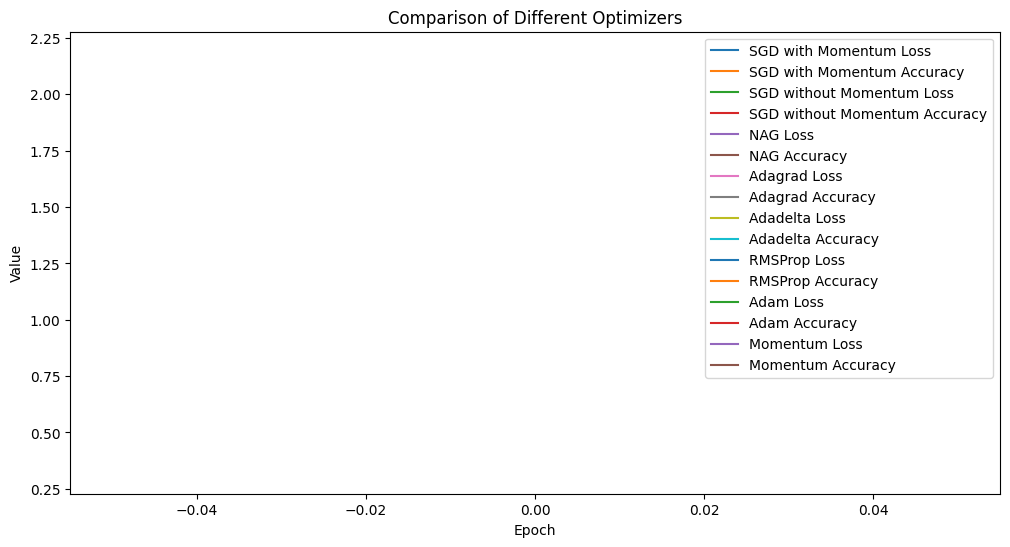

In [7]:
# 開始比較不同優化器的訓練效果
plt.figure(figsize=(12, 6))

for optimizer, optimizer_name in zip(optimizers, optimizer_names):
    loss_history, accuracy_history = train_and_evaluate(optimizer, optimizer_name)
    plt.plot(loss_history, label=f'{optimizer_name} Loss')
    plt.plot(accuracy_history, label=f'{optimizer_name} Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Comparison of Different Optimizers')
plt.legend()
plt.show()